# `lab09`—Earthquake!

**Objectives**

-   Use the MATLAB programming platform to develop and use code.

In order to ease your transition back-and-forth between Python and MATLAB, we have written a [handout](./handout.pdf) which covers the basics of translation.  (Right-click to save and open.)  This handout covers many more functions and tools than you have seen in CS 101, but should serve you well throughout your engineering education since both languages are in common currency at the University of Illinois.

### Getting Started

Today you will carry out the lab assignment in MATLAB. We will actually be using the GNU Octave language, which is an open-source version of MATLAB. This Jupyter notebook has been modified to support the Octave. You can also test your code in MATLAB if you have it installed on your computer.

### Seismograms

A seismometer measures the motion of the ground, particularly seismic waves which may originate from earthquakes or volcanic eruptions.  Data often include both the magnitude and the direction of motion, although in our lab today we will only consider magnitude data for simplicity.  The resulting data may be recorded in the form of a *seismogram*, which reflects the simple motion of a needle against a roll of paper.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Kinemetrics_seismograph.jpg/800px-Kinemetrics_seismograph.jpg)

![](https://tc1seismometer.files.wordpress.com/2012/07/20120204_200532_bsuz_psn.gif?w=2000&h=)

We will use a generated data set using random numbers for this lab, using a technique you will recreate in the last part.

In [1]:
answerPass = [0 0 0 0 0 0 0]

answerPass =

   0   0   0   0   0   0   0



### <span style="color:#345995">Exercise 1: Load Seismographic Data</span>

-   Load the data set from the file `quakedata.txt` using [`importdata`](https://www.mathworks.com/help/matlab/ref/importdata.html), which automatically parses it into an array.  Assign this imported data set the name `seis` (for seismogram).  The first row contains the time values in seconds, and the second row contains the displacement data from the seismometer.
        

In [7]:
%grade
% Use the importdata function to load quakedata.txt
seis = importdata('quakedata.txt')  % load the array
disp( size(seis) ); % output the dimensions of the array

seis =

 Columns 1 through 6:

     0.00000     1.00000     2.00000     3.00000     4.00000     5.00000
     0.12356     0.97216     0.91618     1.33990    -1.90256     0.28804

 Columns 7 through 12:

     6.00000     7.00000     8.00000     9.00000    10.00000    11.00000
    -2.08695    -1.47260    -0.75406    -0.95489    -0.55241    -1.83276

 Columns 13 through 18:

    12.00000    13.00000    14.00000    15.00000    16.00000    17.00000
    -1.30655     0.09926    -1.38119    -0.08744    -0.99014    -0.75248

 Columns 19 through 24:

    18.00000    19.00000    20.00000    21.00000    22.00000    23.00000
    -0.21336     1.16209    -1.50720     0.01980    -1.79557     0.01110

 Columns 25 through 30:

    24.00000    25.00000    26.00000    27.00000    28.00000    29.00000
    -0.30372     0.60168     0.40718     0.87138     0.20778     1.74709

 Columns 31 through 36:

    30.00000    31.00000    32.00000    33.00000    34.00000    35.00000
     0.18992     0.73185    -0.07383 

If you are working on a local installation of MATLAB, after you do this, you will see `seis` appear in the *Workspace* area at right.  `disp` is the MATLAB analogue of `print`, and `size` corresponds to `len`. In Octave, you can use the `whos` command to display a list of variables.

In [15]:
whos


Variables in the current scope:

   Attr Name            Size                     Bytes  Class
   ==== ====            ====                     =====  ===== 
        ans             1x5                          5  char
        answerPass      1x7                         56  double
        seis            2x350                     5600  double
        test_data       2x350                     5600  double
        test_size       1x2                         16  double

Total is 1414 elements using 11277 bytes



If you have loaded everything correctly, this set of tests should pass. 

In [12]:
function [ result ] = isclose(a, b)
    rel_tol = 1e-6;
    result = abs(a - b) <= max(rel_tol * max(abs(a), abs(b)));
end

In [13]:
% Your code should pass these tests.  Do not edit this cell.
test_data = importdata( 'quakedata.txt' );  % load the array
test_size = size( test_data );

if  test_size( 1 ) ~= 2 
    disp ("You do not have two rows.")
    
elseif  test_size( 2 ) ~= 350
    disp ("You do not have 350 columns.")
    
elseif ~isclose( seis( 400 ), 0.707633859307113)
    disp ("You do not appear to have loaded the data.")
    
else 
    answerPass(1) = 1;
    disp ("All Tests Passed")
end

All Tests Passed


Let's see what these data represent as a pictorial seismogram.

You should use the MATLAB [`plot`](https://www.mathworks.com/help/matlab/ref/plot.html) function.  It works like this:

        plot(x_values, y_values, 'b-');

### <span style="color:#345995">Exercise 2: Display Data Layout</span>

-   Plot the second row of `seis` against the first.  Save the plot as `figure_1.png` in your working directory.  (You can use the print command to save a figure. The '-d' flag can be used to specify the extension, e.g. '-dpng' or '-djpg')
    
        print -dpng filename.png
        
        
    Since you have to refer to the entire array, you'll have to specify the whole row in the indexing:
        
        plot(seis(1,:), seis(2,:), 'b-');
    
    Pay attention to how MATLAB handles rows and columns, and transpose if necessary to plot what you intend.

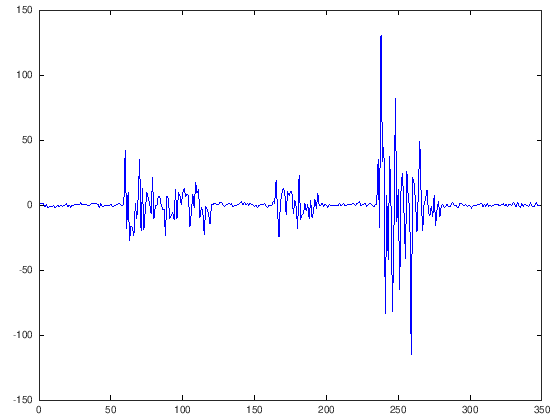

In [38]:
% Write code to plot the first row of seis against the second here and save it as a png
plot1 = plot(seis(1,:),seis(2,:), 'b-');
print -dpng figure_1.png

In [39]:
#Testing for exercise 2
# Do NOT modify cell! If you got Exercise 2 right it will display "All Tests Passed Successfully"
testSlice = [ 0.12356   0.97216   0.91618   1.33990  -1.90256   0.28804  -2.08695  -1.47260  -0.75406  -0.95489];
yData = get(plot1,'YData');
StudentSlice = yData(1:10);
tolerance = sum (StudentSlice - testSlice);
if  tolerance < 1e-5
    answerPass(2) = 1;
    disp ("All tests passed successfully")
    #set the variable for this test passed
else 
    disp ("Test failed")
end

All tests passed successfully


### Earthquake Detection

An earthquake event can be reconstructed from numerical data by looking at how big the oscillations are—that is, the *variance*.  (Our data set `seis` clearly contains zones where the variance is locally different.)  Mathematically, we prefer to use the square root of the variance, or the *standard deviation*, for convenience.  We define the standard deviation of the elements of a list $X$ as

$$
\text{var}(X) = \sqrt{\text{avg}\left( (X - \bar{X})^2 \right)}
$$

where $\bar{X}$ is the average of the data set.  MATLAB conveniently provides a way to calculate the average value of a list of values:
    
    X = [ 0.57473 0.09365 0.20067 0.20592 ]  % define an array
    disp( mean( X ) )

MATLAB also supports direct calculation of the standard deviation (and several other statistical quantities):
    
    disp( std( X ) )

Suppose that we have a set of seismograph magnitudes and we wish to detect events above a certain threshold.  Using these functions for the average and standard deviation, we can easily calculate the mean and standard deviation for an entire data set, but that doesn't really tell us what we want to know, which is *when* the earthquake threshold event occurred.

![](./img/mean_stdev_all.png)

It is better, in cases like this, to use a *moving-window* or *rolling* function, which instead returns the calculation based on a subset of the entire data set.  For example, a two-point moving average of the data set `[3 4 2 5 1]` would look like `[NaN (3+4)/2 (4+2)/2 (2+5)/2 (5+1)/2]` $\rightarrow$ `[NaN 3.5 3.0 3.5 3.0]`—the $i$th moving average is the average of the $i-1$th and $i$th values in the original list or array.  More generally, the $n$-point moving average we will define uses the last $n$ data values to calculate an average.  (`Nan` stands for *n*ot *a* *n*umber, a special data type used when you need the data to be a numeric data type but still not carry an actual value.)  For instance, a twenty-day rolling average of a financial data set would look like this:

![](./img/mean_rolling.png)

These are very useful for smoothing data sets which contain a lot of noise and variability which obscure the true trends.  You often see them used in financial analyses, for instance, or to filter electronic signals in electrical engineering.

This data set has a fairly consistent standard deviation (look at the $y$ axis):

![](./img/stdev_rolling.png)

Together, the rolling mean and rolling standard deviation can give us a pretty good picture of the statistical behavior of a data set:

![](./img/all_rolling.png)

### <span style="color:#345995">Exercise 3: Filter Data</span>

-   Examine the function `rolling_mean` which accepts as parameters an array called `data` containing a row of time values and a row of measurements (just like `seis`), and a window size `n`.  The function should return the resulting array of time points and calculated rolling-window means. 
    
    We introduce the notion here of a *stencil*—that is, how the values in an array or a grid relate to each other in a particular calculation.  For instance, to calculate the rolling mean with a value of $n = 5$, you require the value at the current index (in red) and two array values behind and two ahead (in yellow):
    
    <img src="./img/stencil.png" width="50%;"/>
    
    Thus at the edges of the array, we will have undefined values (`Nan`s) since we can't calculate the five-point rolling mean with only three or four points.

In [28]:
%grade
%% Compose a function rolling_mean which accepts as parameters an array
%  called `data` containing a row of time values and a row of measurements
%  and a window size `n`.
%
%  The function should return the resulting array of time points and
%  calculated rolling-window means.
%
function [ means ] = rolling_mean( data, n )
    % test that the input is valid
    assert(n > 0,         'n should be positive.');
    assert(~mod(n,1),     'n should be an integer.');
    assert(~(mod(n,2)-1), 'n should be odd.');
    
    % get range "stencil"---how far forward and back to include values
    rng = floor(n/2)  % consider using `floor` function, see image above
    
    % calculate the rolling mean
    means = zeros(size(data));
    means(1,:) = data(1,:);  % copy the x-values
    for i = 1:size(data,2)  % loop over all values in the array
        % If the stencil doesn't apply, then set the value to NaN.
        if i < rng+1 || i > (size(data,2)-rng)
            means(2,i) = NaN;
            continue;
        end
        
        %Calculate the mean of the values in the appropriate range
        means(2,i) = mean(data(2, i - rng:i + rng));
    end
end


If you have written this correctly, the following set of tests should pass. Remember to end lines which assign values to variables with a semicolon, else octave will keep printing out the output of those lines repeatedly.

rng =  3
All Tests Passed


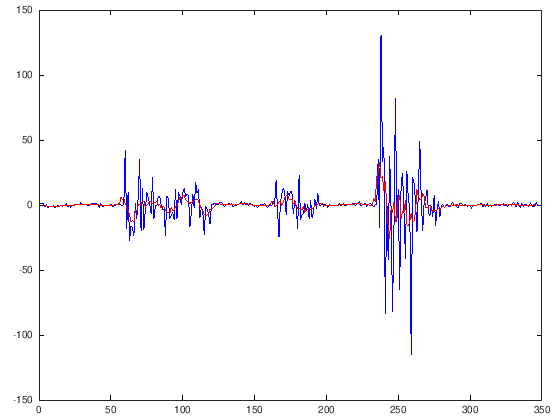

In [29]:
% Your code should pass these tests.  Do not edit this cell.
test_data = importdata( 'quakedata.txt' );  % load the array
test_means = rolling_mean( test_data,7 );  % calculate the rolling means
test_size = size( test_means );

if  test_size( 1 ) ~= 2 
    disp ("You do not have two rows.")
    
elseif  test_size( 2 ) ~= 350
    disp ("You do not have 350 columns.")
    
elseif ~isclose( test_means( 2,100 ), 4.994080729574138 )
    disp ("Your calculation is incorrect.")
    
else 
    answerPass(3) = 1;
    disp ("All Tests Passed")
end

#assert( test_size(1) == 2,   'You do not have two rows.' )
#assert( test_size(2) == 350, 'You do not have 350 columns.' )
#assert(isclose( test_means( 2,100 ), 4.994080729574138 ), 'Your calculation is incorrect.' )
plot( seis( 1,: ),seis( 2,: ),'b-',test_means( 1,: ),test_means( 2,: ),'r-' )
#disp( 'All tests passed successfully.' )

### <span style="color:#345995">Exercise 4: Plot Rolling Standard Deviation</span>

-   Compose a function `rolling_std` which accepts as parameters an array called `data` containing a row of time values and a row of measurements (just like `seis`), and a window size `n`.  The function should return the resulting array of time points and calculated rolling-window standard deviations.

In [34]:
%grade
%% Compose a function rolling_std which accepts as parameters an array
%  called `data` containing a row of time values and a row of measurements
%  and a window size `n`.
%
%  The function should return the resulting array of time points and
%  calculated rolling-window standard deviations.
%
function [ stds ] = rolling_std( data, n )
    % test that the input is valid
    assert(n > 0,         'n should be positive.');
    assert(~mod(n,1),     'n should be an integer.');
    assert(~(mod(n,2)-1), 'n should be odd.');
    
    % YOU WRITE THIS CODE
    % It should be a straightforward modification of `rolling_mean`, using
    % the MATLAB standard deviation function.  To find this, use the `f_x`
    % button at the left of the prompt in the Command Window in MATLAB.
        % get range "stencil"---how far forward and back to include values
    rng = floor(n/2)  % consider using `floor` function, see image above
    
    % calculate the rolling mean
    stds = zeros(size(data));
    stds(1,:) = data(1,:);  % copy the x-values
    for i = 1:size(data,2)  % loop over all values in the array
        % If the stencil doesn't apply, then set the value to NaN.
        if i < rng+1 || i > (size(data,2)-rng)
            stds(2,i) = NaN;
            continue;
        end
        
        %Calculate the mean of the values in the appropriate range
        stds(2,i) = std(data(2, i - rng:i + rng));
    end
        
end

If you have loaded everything correctly, this set of tests should pass:

rng =  3
All Tests Passed


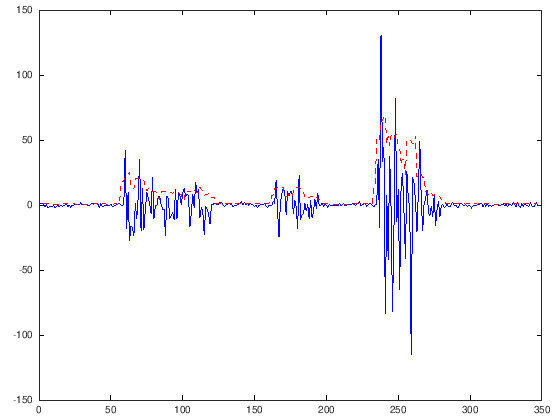

In [35]:
% Your code should pass these tests.  Do not edit this cell.
test_data = importdata('quakedata.txt');  % load the array
test_stds = rolling_std(test_data, 7);    % calculate the rolling means
test_size = size(test_stds);


if  test_size( 1 ) ~= 2 
    disp ("You do not have two rows.")
    
elseif  test_size( 2 ) ~= 350
    disp ("You do not have 350 columns.")
    
elseif ~isclose(test_stds(2,100), 7.983935137385763)
    disp ("Your calculation is incorrect.")
    
else 
    answerPass(4) = 1;
    disp ("All Tests Passed")
end

plot(seis(1,:),seis(2,:),'b-',test_stds(1,:),test_stds(2,:),'r--')


With `rolling_std` in tow, it should be straightforward to identify threshold events (earthquakes or smaller tremors) against a low-noise background.

Examine the data to determine the first point (index) at which the standard deviation exceeds 5.0.  We will designate points like these as the *beginnings* of events.  (There's nothing magical about the value 5.0; it's just much larger than the standard deviation of the preceding run of values.)

Let's make an attractive plot with earthquake and aftershock data clearly highlighted.  MATLAB can filter the data by value, meaning that we can select highly-variable data from a lower-variability background and plot them separately.

### <span style="color:#345995">Exercise 5: Plot Data</span>

-   Save the plot generated by the following code as `figure_2.png` in your working directory.

rng =  2
rng =  2


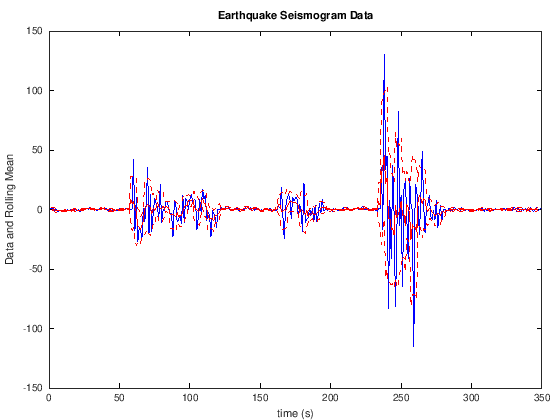

In [40]:
rm = rolling_mean(seis, 5);
rs = rolling_std(seis, 5);

plot(seis(1,:), seis(2,:),       'b-', ...
     rs(1,:),   rm(2,:),         'r-', ...
     rs(1,:),   rm(2,:)-rs(2,:), 'r--', ...
     rs(1,:),   rm(2,:)+rs(2,:), 'r--')

title('Earthquake Seismogram Data')
ylabel('Data and Rolling Mean')
xlabel('time (s)')

# Your code here
print -dpng figure_2.png

Finally, we can use features of seismogram data to calculate (for instance) how far away the earthquake is.  There is typically a lapse between the primary waves (P), the secondary waves (S) and the surface waves<sup>[[RochaND](http://academic.brooklyn.cuny.edu/geology/grocha/plates/platetec19.htm)]</sup>.  The time lapse between P and S tells us how far away the earthquake occurred (given certain assumptions and observations about the interior of the earth), and the combination of several seismograms from different locations tells us the magnitude and location<sup>[[RochaND](http://academic.brooklyn.cuny.edu/geology/grocha/plates/platetec20.htm)]</sup>.  That process is fairly involved, so you should simply calculate the S–P time interval from the change in rolling variance.

![](./img/earthquake_data.png)

At what point (in your data) does the standard deviation first exceed 5.0?  This is point P.  The next time it falls to a small value for a while and then jumps back up above 5.0 represents point S.  This lapse is the value you should use for the S–P interval.

What is the distance of the earthquake in miles?  To obtain this value, simply multiply the S–P interval in seconds by 5.7.  (This is a gross oversimplification generally, but is adequate for the current problem.<sup>[[TongND](http://www.oakton.edu/user/4/billtong/eas100lab/lab10quake.htm)]</sup>)

### <span style="color:#345995">Exercise 6:  Measure Distance from Gap</span>

-   Compose a function `distance` which accepts as parameters an array called `data` containing a row of time values and a row of measurements (just like `seis`).  The function should return the calculated distance in miles.

In [43]:
%grade
%% Compose a function distance which accepts as parameters an array called
%  data containing a row of time values and a row of measurements
%
%  The function should return the calculated distance in miles.
%
function [ dist ] = distance( data )
    
    % calculate the rolling-window standard deviations
    % YOU WRITE THIS CODE
    % store the result of the five-point rolling standard deviation in
    % the array `stds`
    stds = rolling_std(data, 5);
    
    % find the point P
    threshold_values = stds(2,:)>5;  % you should look at the form of std>5
    P = find(threshold_values,1);
    
    % find the point S
    % by visual inspection, the plot goes to zero between indexes 120 to
    % 150, so use 150 as the starting point to search forward for S
    S = find(threshold_values(150:end),1) + 149;
    
    % calculate the difference between P and S (in seconds)
    % YOU WRITE THIS CODE
    diff = S - P
    % calculate the distance using the formula
    % YOU WRITE THIS CODE
    dist = 5.7 * diff
end

If you have loaded everything correctly, this set of tests should pass:

In [44]:
% Your code should pass these tests.  Do not edit this cell.
test_data = importdata('quakedata.txt');  % load the array
test_dist = distance(test_data)
assert(isclose(test_dist, 598.5), 'Your calculation is incorrect.')
disp('All tests passed successfully.')

rng =  2
diff =  105
dist =  598.50
test_dist =  598.50
All tests passed successfully.


###  Making Your Own Earthquake (Data)

Let's compose a function to generate a data set like that above.  While not as exciting as a real earthquake, it's a lot cleaner of a data set to work with.

We will use a random number generator to generate a list of numbers with a specific standard deviation.  Given a number of times and a standard deviation, we want to create a list of random "measurements" which represent the earth's motion during that time.

We'll make the function more general than this though:  it will accept a list of time lengths and a list of corresponding standard deviations.  This way we can make longer time series of measurements like that used as `seis`.

### <span style="color:#345995">Exercise 7:  Generate Spoofed Data</span>

-   Compose a function `quake` which accepts as parameters a list of time lengths `spans` and a list of corresponding standard deviations `stds`.  The function should return an array of random earthquake data as a row of time points and a row of generated measurements.  (Details are included in the following cell.) Please save the file as `figure_3.png` (See directions in the cell below this one to save the plot). 

In [49]:
%grade
%% Compose a function `quake` which accepts as parameters a list of time
%  lengths `spans` and a list of corresponding standard deviations `stds`.
%
%  The function should return an array of random earthquake data as a row
%  of time points and a row of generated measurements.
%
function [ data ] = quake( spans, stds )
    % expand spans and stds into an array of standard deviations
    stdev = [];
    for i = 1:size(spans,2)
        new_array = ones(1,spans(i)) * stds(i);
        stdev = cat(2, stdev, new_array);
    end
    
    % generate random data by specified standard deviations
    data = zeros(2, sum(spans));

    % set the first row to the range, [1 2 3 ... sum(spans)] using MATLAB
    data(1,:) = 1:sum(spans); %YOU WRITE THIS CODE
    for j = 1:size(data,2)
        data(2,j) = stdev(j) * randn();
    end
end

If you have loaded everything correctly, this set of tests should pass:

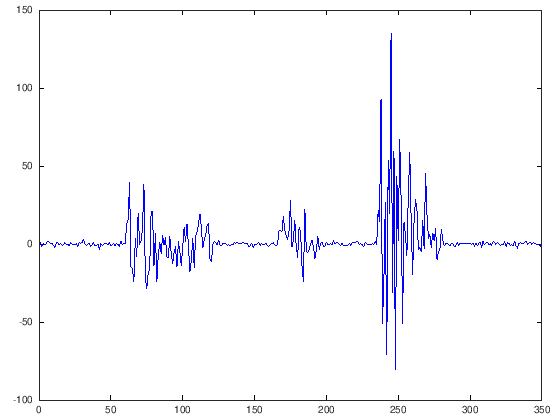

In [51]:
% Your code should pass these tests.  Edit this cell to save the plot as figure_3.png
spans = [60 20 40 45 20 10 40 25 10 10 10 60];
stds  = [ 1 20 10  1 15  5  1 60 20 10  1  1];
quakedata = quake(spans,stds);

% the sum of spans should equal the final length
assert(size(quakedata,2) == sum(spans),      'Your data set is the wrong size.');
test_max = max(quakedata,[],2);
%assert(test_max(2) < sum(quakedata(2,:)), 'Something appears to be wrong with your data.');

plot(quakedata(1,:), quakedata(2,:), 'b-');

#YOUR CODE HERE to save the plot as figure)3.png
print -dpng figure_3.png



### Lab Submission (Important please read!)

### <span style="color:#345995">Submit Your Lab</span>

-   To complete this lab, you should save your files to the working directory using the print commands.  We expect to see the following files, along with your code in this notebook:

    -   `figure_1.png`
    -   `figure_2.png`
    -   `figure_3.png`
    
    Once that is done, you may `Submit` the lab. Make sure to ask a TA/CA to take a look at your figures and check you off manually